In [45]:
using Plots
using MAT

In [46]:
function FlexureLineLoad(x, V0, α, D)
    w = V0*α^3/8/D * exp(-x/α) * (cos(x/α) + sin(x/α))
    return w
end

FlexureLineLoad (generic function with 1 method)

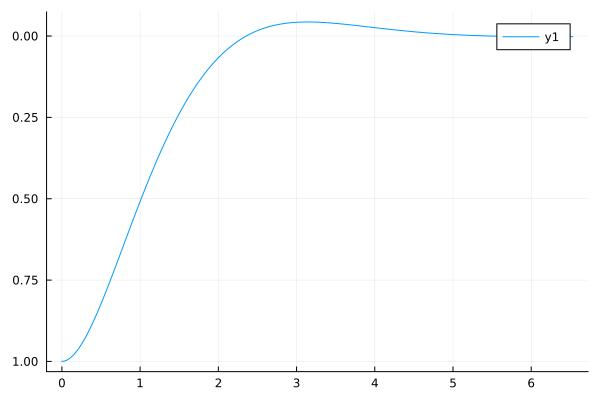

In [47]:
x  = LinRange(0., 1000.e3, 200)
ν  = 0.25
E  = 5e10
h  = 100e3
D  = E*h^3/12/(1-ν^2)
V0 = 500.0
ρm = 3300.
ρw = 0*1000.
g  = 9.81
α  = (4D/(ρm-ρw)/g)^(1/4)
w0 = V0*α^3/8/D
w  = FlexureLineLoad.(x, V0, α, D);
plot( x./α, w./w0, yflip=true )

w06 = zm6_pos[1] = -30.87342071533203
w07 = zm7_pos[1] = -15.042088508605957


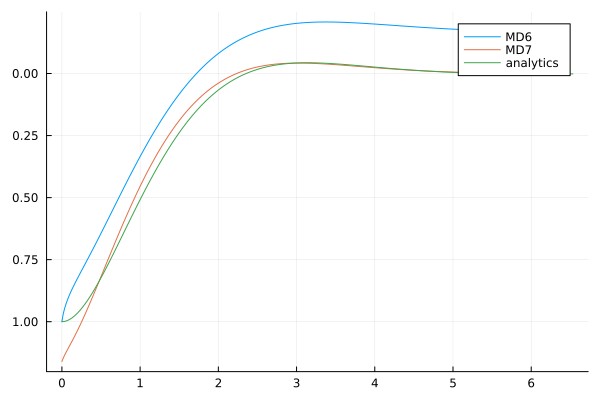

In [89]:
file = matopen("/Users/imac/REPO_GIT/MD7_reformat/misc/Python_visualisation/ElasticFlexureMD6.mat")
xm = read(file, "xtopo") 
zm = read(file, "ztopo") 
close(file)
xm6_pos = xm[xm.>9000.0] 
zm6_pos = zm[xm.>9000.0]
xm6_pos .-= xm6_pos[1]
@show w06 = zm6_pos[1] 

file = matopen("/Users/imac/REPO_GIT/MD7_reformat/misc/Python_visualisation/ElasticFlexureLineLoadHalf.mat")
xm = read(file, "x_mark") 
zm = read(file, "z_mark") 
close(file)
xm7_pos = xm[xm.>9000.0] 
zm7_pos = zm[xm.>9000.0]
xm7_pos .-= xm7_pos[1]
@show w07 = zm7_pos[1] 

p = plot()
p = plot!( xm6_pos./α, zm6_pos./w06 .+ 0.16*0, yflip = true, label="MD6")
p = plot!( xm7_pos./α, zm7_pos./w07 .+ 0.16*0, yflip = true, label="MD7")
p = plot!( x./α, w./w0, label="analytics")

In [76]:
@show G = E/2/(1+ν)
@show K = E/3/(1-2ν) # 3D formula
@show K = E/2/(1-ν)  # 2D formula ???
@show β = 1/K

G = (E / 2) / (1 + ν) = 2.0e10
K = (E / 3) / (1 - 2ν) = 3.3333333333333332e10
K = (E / 2) / (1 - ν) = 3.3333333333333332e10
β = 1 / K = 3.0e-11


3.0e-11